<a href="https://colab.research.google.com/github/MuhammadUsama100/Diabetes_Identification/blob/master/Diabetes_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 

In [0]:
import io

In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] =  diabetes[cols_to_norm].apply(lambda x: (x-x.min())/ (x.max() - x.min())) # normalization

In [13]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [14]:
import tensorflow as tf 

In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
Glucose_concentration = tf.feature_column.numeric_column('Glucose_concentration')
Blood_pressure = tf.feature_column.numeric_column('Blood_pressuret')
Triceps = tf.feature_column.numeric_column('Triceps')
Insulin = tf.feature_column.numeric_column('Insulin')
BMI = tf.feature_column.numeric_column('BMI')
Pedigree = tf.feature_column.numeric_column('Pedigree')
Age = tf.feature_column.numeric_column('Age')


In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group" , ["A","B","C","D"])

In [0]:
import matplotlib.pyplot as plt


In [0]:
%matplotlib inline

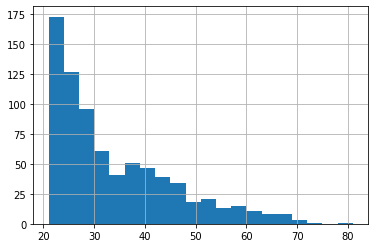

In [23]:
diabetes["Age"].hist(bins = 20)

In [0]:
age_bucket =  tf.feature_column.bucketized_column(Age , boundaries=[20 , 30 , 40, 50 , 60 , 70 , 80 ])

In [0]:
feats_cols = [num_preg ,Glucose_concentration ,Blood_pressure ,Triceps ,Insulin ,BMI ,Pedigree ,age_bucket ]

In [0]:
# train test split 

In [0]:
x_data =  diabetes.drop("Class" ,axis=1)

In [30]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [0]:
labels =  diabetes["Class"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train ,  X_test , y_train ,  y_test = train_test_split(x_data ,  labels ,  test_size = 0.3 , random_state = 101 )